# Analysis of the population and dwelling occupancy/vacancy rates in Donegal


In [1]:
# Importing pyaxis in order to read .px file type
from pyaxis import pyaxis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# URL for dataset containing information on the population and dwelling occupancy/vacancy rates in dongeal, from CSO.ie
donegalDataURL = 'https://www.cso.ie/px/pxeirestat/Database/eirestat/Profile%201%20-%20Geography/CD154.px'

# Parsing the file - This will give the ["METADATA"] and ["DATA"] subsets
px = pyaxis.parse(donegalDataURL, encoding='ISO-8859-2')

# Creating a Pandas DataFrame from the ["DATA"]
df = pd.DataFrame.from_dict(px["DATA"])

# Finding the number of rows and colums so that max_rows can be set
rows, columns = df.shape

# Setting max rows
pd.set_option('display.max_rows', rows)

In [2]:
# Checking for null values
df.isnull().sum()

Townlands        0
CensusYear       0
Statistic        0
DATA          2696
dtype: int64

In [3]:
# Dropping null values
df = df.dropna()

In [4]:
df.head(10)

,Townlands,CensusYear,Statistic,DATA
8,"Abbey Island, Ballyshannon Rural, Co. Donegal",2011,Population (Number),12.0
9,"Abbey Island, Ballyshannon Rural, Co. Donegal",2011,Males (Number),8.0
10,"Abbey Island, Ballyshannon Rural, Co. Donegal",2011,Females (Number),4.0
11,"Abbey Island, Ballyshannon Rural, Co. Donegal",2011,Private households occupied (Number),5.0
12,"Abbey Island, Ballyshannon Rural, Co. Donegal",2011,Private households unoccupied (Number),1.0
13,"Abbey Island, Ballyshannon Rural, Co. Donegal",2011,Vacant dwellings (Number),1.0
14,"Abbey Island, Ballyshannon Rural, Co. Donegal",2011,Housing stock (Number),6.0
15,"Abbey Island, Ballyshannon Rural, Co. Donegal",2011,Vacancy rate (%),16.7
16,"Abbeylands, Ballyshannon Rural, Co. Donegal",2011,Population (Number),135.0
17,"Abbeylands, Ballyshannon Rural, Co. Donegal",2011,Males (Number),70.0


In [5]:
df.dtypes

Townlands     object
CensusYear    object
Statistic     object
DATA          object
dtype: object

In [6]:
# Converting DATA column type to float 
df["DATA"] = df["DATA"].astype(float)

df.dtypes

Townlands      object
CensusYear     object
Statistic      object
DATA          float64
dtype: object

In [7]:
# Pivoting DataFrame 
df = df.pivot(index="Townlands", columns="Statistic", values="DATA")

df.head(10)

Statistic,Females (Number),Housing stock (Number),Males (Number),Population (Number),Private households occupied (Number),Private households unoccupied (Number),Vacancy rate (%),Vacant dwellings (Number)
Townlands,,,,,,,,
"Abbey Island, Ballyshannon Rural, Co. Donegal",4.0,6.0,8.0,12.0,5.0,1.0,16.7,1.0
"Abbeylands, Ballyshannon Rural, Co. Donegal",65.0,79.0,70.0,135.0,54.0,25.0,27.8,22.0
"Adderville, Straid, Co. Donegal",25.0,21.0,28.0,53.0,16.0,5.0,23.8,5.0
"Adderwal, Glenleheen, Co. Donegal",4.0,7.0,4.0,8.0,4.0,3.0,42.9,3.0
"Admiran, Stranorlar, Co. Donegal",175.0,139.0,167.0,342.0,116.0,23.0,12.2,17.0
"Aghadachor, Glen, Co. Donegal",6.0,38.0,6.0,12.0,6.0,32.0,84.2,32.0
"Aghadowey, Ballintra, Co. Donegal",10.0,7.0,11.0,21.0,7.0,0.0,0.0,0.0
"Aghadreenan, Rosnakill, Co. Donegal",20.0,24.0,26.0,46.0,14.0,10.0,41.7,10.0
"Aghafoy, Pettigoe, Co. Donegal",3.0,5.0,4.0,7.0,3.0,2.0,40.0,2.0


### Prepping the Census data for merging on the shapefile

Most records have 3 entries for the townland and remaining have 4. The census data is going to be merged with the shapefile on the NAME_TAG, ED_NAME and CO_NAME attributes within the shapefile. These correspond to the 1st, 2nd and 3rd entries (respectively) of the townlands where there are only 3 entries and the 1st, 3rd and 4th entries (respectively) where there are 4 entries.

In [8]:
# Splitting the townlands index by the ',' 
townlandsDF = pd.DataFrame(df.index.str.split(", ").values.tolist())

townlandsDF.head()

,0,1,2,3
0,Abbey Island,Ballyshannon Rural,Co. Donegal,None
1,Abbeylands,Ballyshannon Rural,Co. Donegal,None
2,Adderville,Straid,Co. Donegal,None
3,Adderwal,Glenleheen,Co. Donegal,None
4,Admiran,Stranorlar,Co. Donegal,None


In [9]:
# Getting all townlands where there are only 3 entries
townlandsDF_3Entries = townlandsDF[townlandsDF[3].isnull()]

# Renaming the columns to match the column names on the shapefile
townlandsDF_3Entries.rename(columns={0:'NAME_TAG', 1:'ED_NAME', 2:'CO_NAME'}, inplace=True)

# Dropping the blank column
townlandsDF_3Entries = townlandsDF_3Entries.drop(columns=3)

townlandsDF_3Entries.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,NAME_TAG,ED_NAME,CO_NAME
0,Abbey Island,Ballyshannon Rural,Co. Donegal
1,Abbeylands,Ballyshannon Rural,Co. Donegal
2,Adderville,Straid,Co. Donegal
3,Adderwal,Glenleheen,Co. Donegal
4,Admiran,Stranorlar,Co. Donegal


In [10]:
# Getting all townlands where there are 4 entries
townlandsDF_4Entries = townlandsDF[townlandsDF[3].notnull()]

# Dropping the blank column
townlandsDF_4Entries_dropCol1 = townlandsDF_4Entries.drop(columns=1)

# Renaming the columns to match the column names on the shapefile
townlandsDF_4Entries_dropCol1.rename(columns={0:'NAME_TAG', 2:'ED_NAME', 3:'CO_NAME'}, inplace=True)

townlandsDF_4Entries_dropCol1.head()

,NAME_TAG,ED_NAME,CO_NAME
196,Ballymacarry,Buncrana Rural,Co. Donegal
619,Coolcholly,Ballyshannon Urban,Co. Donegal
842,Drumacrin,Bundoran Rural,Co. Donegal
1022,Dunmuckrum,Bundoran Rural,Co. Donegal
1083,Finner,Bundoran Rural,Co. Donegal


In [11]:
# Concatenating the townlands dataframes
townlandsDF = pd.concat([townlandsDF_3Entries, townlandsDF_4Entries_dropCol1])

In [12]:
# Sorting the index so that the rows are back in the original order before joining
townlandsDF.sort_index(inplace=True)

In [13]:
# Resetting the index of df and joining on the sorted index of townlandsDF
df = df.reset_index().join(townlandsDF)

df.tail()

,Townlands,Females (Number),Housing stock (Number),Males (Number),Population (Number),Private households occupied (Number),Private households unoccupied (Number),Vacancy rate (%),Vacant dwellings (Number),NAME_TAG,ED_NAME,CO_NAME
2299,"Woodland, Castlewray, Co. Donegal",142.0,90.0,140.0,282.0,85.0,5.0,5.6,5.0,Woodland,Castlewray,Co. Donegal
2300,"Woodlands, Feddyglass, Co. Donegal",11.0,9.0,10.0,21.0,8.0,1.0,0.0,0.0,Woodlands,Feddyglass,Co. Donegal
2301,"Woodpark, Corravaddy, Co. Donegal",103.0,97.0,113.0,216.0,80.0,17.0,16.5,16.0,Woodpark,Corravaddy,Co. Donegal
2302,"Woodquarter, Cranford, Co. Donegal",45.0,39.0,48.0,93.0,32.0,7.0,17.9,7.0,Woodquarter,Cranford,Co. Donegal
2303,"Woodtown, Gortnavern, Co. Donegal",14.0,9.0,11.0,25.0,9.0,0.0,0.0,0.0,Woodtown,Gortnavern,Co. Donegal


## Visualising the Data

In [14]:
# Adapted from https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

# Importing Geopandas
import geopandas as gpd

In [15]:
# Loading the shapefile
map_df = gpd.read_file("DATA/townlands.shp")

ERROR:fiona._env:Unable to open EPSG support file gcs.csv.  Try setting the GDAL_DATA environment variable to point to the directory containing EPSG csv files.
ERROR:fiona._env:Unable to open EPSG support file gcs.csv.  Try setting the GDAL_DATA environment variable to point to the directory containing EPSG csv files.


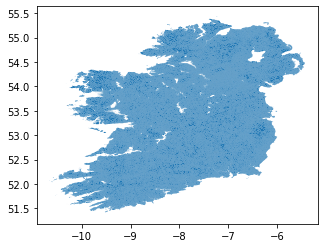

In [16]:
# Plotting the empty map
map_df.plot()

In [17]:
pd.set_option('display.max_columns', 100)

In [18]:
map_df = map_df[map_df['CO_NAME'] == "Donegal" ] 

In [19]:
# Dropping columns where the ED_NAME attribute contains None values

map_df = map_df[map_df['ED_NAME'].notnull()]

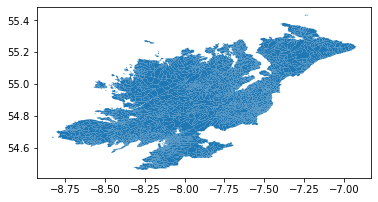

In [20]:
map_df.plot()

In [21]:
map_df.head()

,OSM_ID,NAME_TAG,NAME_GA,NAME_EN,ALT_NAME,ALT_NAME_G,OSM_USER,OSM_TIMEST,ATTRIBUTIO,LOGAINM_RE,CO_NAME,CO_OSM_ID,CO_LOGAINM,CP_NAME,CP_OSM_ID,CP_LOGAINM,ED_NAME,ED_OSM_ID,ED_LOGAINM,BAR_NAME,BAR_OSM_ID,BAR_LOGAIN,T_IE_URL,AREA,LATITUDE,LONGITUDE,EPOCH_TSTM,geometry
545,-4142177.0,Garveross,Garbhros,Garveross,None,None,idnoc,2014-10-28 03:40:23+01,None,14823,Donegal,-283732.0,100013,Glencolumbkille,-4170462.0,789,Kilgoly,-4573095.0,None,Banagh,-5760409.0,54,http://www.townlands.ie/donegal/banagh/glencol...,5.793334e+05,54.714895,-8.742563,1.414464e+09,"POLYGON ((-8.7524113 54.7181465, -8.7523351999..."
549,-4156908.0,Rathlin O'Birne Island,OileÃ¡in Reachlainn UÃ­ Bhirn,Rathlin O'Birne Island,None,None,idnoc,2014-11-03 01:35:01+01,None,14967,Donegal,-283732.0,100013,Glencolumbkille,-4170462.0,789,Malinbeg,-4573096.0,None,Banagh,-5760409.0,54,http://www.townlands.ie/donegal/banagh/glencol...,2.650943e+05,54.663252,-8.827516,1.414975e+09,"POLYGON ((-8.8333903 54.6624988, -8.8333546999..."
556,-4139528.0,Malin More,MÃ¡lainn MhÃ³ir,Malin More,None,None,idnoc,2014-10-27 04:12:51+01,None,14965,Donegal,-283732.0,100013,Glencolumbkille,-4170462.0,789,Malinbeg,-4573096.0,None,Banagh,-5760409.0,54,http://www.townlands.ie/donegal/banagh/glencol...,1.270631e+07,54.688941,-8.756668,1.414380e+09,"POLYGON ((-8.8057488 54.6985896, -8.8057154 54..."
582,-4218790.0,Croweighter,CrÃ³ibh Ãochtair,Croweighter,None,None,idnoc,2014-11-23 02:39:19+01,None,14581,Donegal,-283732.0,100013,Kilcar,-5706697.0,795,Crowkeeragh,-6905557.0,None,Banagh,-5760409.0,54,http://www.townlands.ie/donegal/banagh/kilcar/...,5.006755e+06,54.702727,-8.579940,1.416707e+09,"POLYGON ((-8.604513600000001 54.7016027, -8.60..."
601,-4145073.0,Bangort,BÃ¡nghort,Bangort,None,None,idnoc,2014-10-29 07:48:02+01,None,14811,Donegal,-283732.0,100013,Glencolumbkille,-4170462.0,789,Kilgoly,-4573095.0,None,Banagh,-5760409.0,54,http://www.townlands.ie/donegal/banagh/glencol...,5.126443e+06,54.731942,-8.690936,1.414565e+09,"POLYGON ((-8.7223443 54.7222007, -8.7223062 54..."


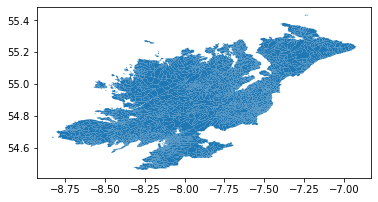

In [22]:
merged = map_df.merge(df, left_on=['NAME_TAG', 'ED_NAME'], right_on=['NAME_TAG', 'ED_NAME'], how='left')

merged.plot()